#### 때로는 삶이 잔인한 유머감각을 가지고 있어, 가능한 한 최악의 시기에 항상 원했던 것을 너에게 준다.  <div style="text-align: right">`-Lisa Kleypas-`</div>
&nbsp;&nbsp;
타이타닉호의 침몰은 역사상 가장 악명 높은 난파선 중 하나이다. 1912년 4월 15일 처녀항해 중 타이타닉호는 빙산과 충돌한 뒤 침몰해 승객과 승무원 2224명 중 1502명이 사망했다. 그래서 **DieTanic**이라는 이름이 생긴 것이다. 이것은 이 세상 어느 누구도 잊을 수 없는 매우 용서할 수 없는 재앙이다.


&nbsp;&nbsp;타이타닉호를 만드는 데 약 750만 달러가 걸렸고 충돌로 인해 바다 밑으로 가라앉았다. Titanic Dataset은 data science로 갈 때 초심자일 때 좋은 데이터이고 Kaggle에 참여하기 좋은 대회이다.


&nbsp;&nbsp;이 노트북의 `목적`은 **예측 모델링 문제에서 workflow가 어떻게 되는지를 알아내는 것**이다. features를 확인하고, 새로운 features를 생성하고 Machine Learning 개념을 알아가보자. 나는 초보들도 모든 단계를 이해할 수 있도록 가능한 한 기본을 지키려고 노력했다.

### <div style="text-align:center">- Notebook 목차 -</div>

#### Part1: Exploratory Data Analysis(EDA)
1) Analysis of the features.

2) Finding any relations or trends considering multiple features.
#### Part2: Feature Engineering and Data Cleaning
1) Adding any few features.

2) Removing redundant features.

3) Converting features into suitable form for modeling.
#### Part3: Predictive Modeling
1) Running Basic Algorithms.

2) Cross Validation.

3) Ensembling.

4) Important Features Extraction.

### Part1: Exploratory Data Analysis(EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- **Age, Cabin, Embarked**는 null 값이 있다.

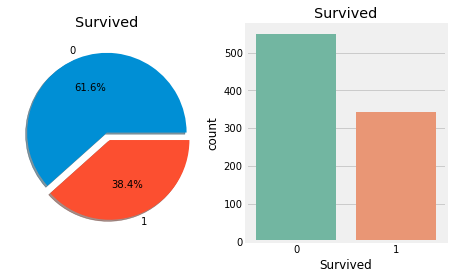

In [4]:
f, ax = plt.subplots(1,2,figsize=(7,4)) # (1,2) 모양으로 도화지 생성
# pie plot / explode : 간격 / autopct : 값 입력 / ax=ax[0] : 도화지 위치 설정 / shadow : 그림자 설정
data['Survived'].value_counts().plot.pie(explode = [0,0.1],autopct='%.1f%%',
                                         ax=ax[0],shadow=True)
ax[0].set_title('Survived'); ax[0].set_ylabel('');

sns.countplot('Survived',data=data,ax=ax[1],palette="Set2")
ax[1].set_title('Survived')
plt.show()

&nbsp;&nbsp;그 사고에서 살아남은 승객은 많지 않다는 것은 명백하다.

&nbsp;&nbsp;훈련 세트 승객 891명 중 350명 정도만 살아남았다. 즉, 전체 훈련 세트의 **38.4%**만이 추락에서 살아남았다.우리는 데이터로부터 더 나은 통찰력을 얻고 categorie별 승객들의 생존 여부를 알아보자.우리는 데이터 세트의 다양한 feature을 사용해 생존율을 확인할 것이다.
#### Features 분석

In [5]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

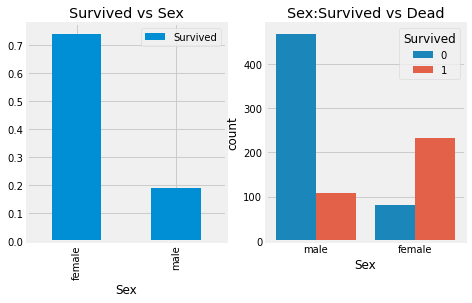

In [6]:
f, ax = plt.subplots(1,2,figsize = (7,4))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

&nbsp;&nbsp;배에 타고 있는 남자들의 수가 여자들의 수보다 훨씬 많다. 그렇지만 여성의 생존 수가 남성의 생존 수의 약 2배이다. 배에 타고 있는 **여성의 생존율은 약 75%인 반면, 남성의 생존율은 약 18-19%**이다.

이 feature는 모델링을 위한 중요한 변수로 보인다.

In [7]:
# Pclass, Survived 별 count
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


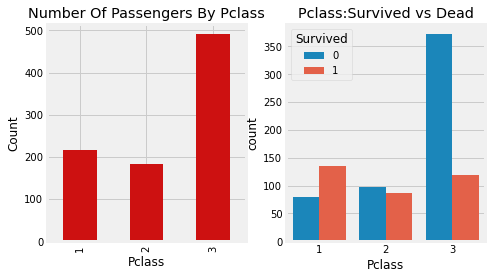

In [8]:
f, ax = plt.subplots(1,2,figsize = (7,4))
data['Pclass'].value_counts()[[1,2,3]].plot.bar(color = ['#CD1111'], ax = ax[0])
sns.countplot('Pclass',hue = 'Survived', data=data, ax = ax[1])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_xlabel('Pclass')
ax[0].set_ylabel('Count')

ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 **돈이 모든 것을 살 수 없다**고 말한다. 그러나 우리는 P클래스가 1인 승객이 구조할 때 매우 높은 우선순위를 부여받았다는 것을 분명히 알 수 있다.P클래스가 3인 승객 수는 훨씬 더 많았지만, 생존자 수는 약 **25%** 정도로 매우 낮다.

Pclass 1인 경우 생존율은 약 **63** %이고 Pclass2의 경우 약 **48** %입니다. 그렇기에 돈과 지위가 중요하다는 것을 알 수 있다.

좀 더 자세히 관찰하고 다른 흥미로운 관찰 결과를 확인해보자. **Sex**, **Pclass**와 함께 생존율을 확인해보자.

In [9]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap = 'autumn_r')

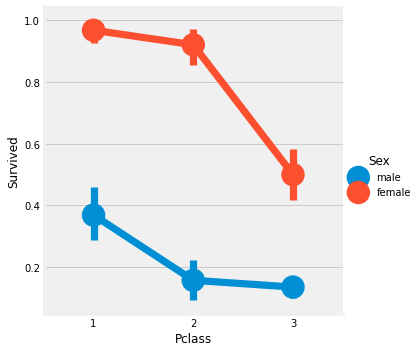

In [10]:
sns.factorplot('Pclass', 'Survived',hue= 'Sex',data = data)
plt.show()

범주별로 쉽게 분류해주는 **FactorPlot**을 이용했다.

**CrossTab**, **FactorPlot**을 보면 P클래스가 1인 여성 94명 중 3명만이 사망했기 때문에 P클래스 1의 여성 생존율이 약 95-96%라고 쉽게 알 수 있다.

P클래스에 상관없이 여성들은 구조하는 동안 최우선 순위가 주어졌음이 분명하다. 심지어 P클래스1의 남성들도 생존율이 매우 낮다.

Pclass도 중요한 feature이다. 다른 feature를 계속 확인해보자.

In [11]:
print('Oldest Passenger was of:',int(data['Age'].max()),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship: {0:.2f} Years'.format(data['Age'].mean()))

Oldest Passenger was of: 80 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.70 Years


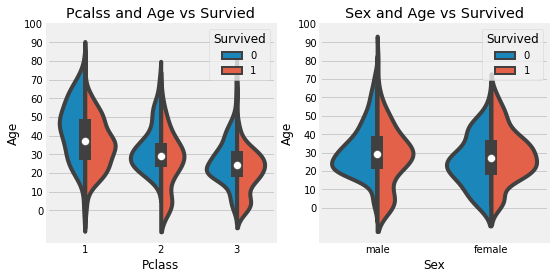

In [12]:
def make_figure(row, col, n=8,m=4):
    n = 4 * col; m = 4 * row
    f, ax = plt.subplots(row, col, figsize = (n,m))
    return f, ax

f, ax = make_figure(1,2)
sns.violinplot("Pclass", "Age", hue = "Survived", data = data, split = True, ax = ax[0])
ax[0].set_title('Pcalss and Age vs Survied')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue= "Survived", data = data,split= True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

- 관찰 결과

1) Pclass에 따라 어린이 수가 증가하고 10 세 미만의 어린이 (즉, 어린이)의 생존율은 Pclass에 상관없이 양호해 보인다.

2) Pclass가 1인 20-50대의 생존율은 높은 편이고 특히 여성은 더 좋다.

3) 남성은 나이가 증가할 수록 생존률이 낮아짐을 볼 수 있다.

앞에서 보았듯이, 'Age'는 **177**개의 null 값을 가지고 있다. 이러한 NaN 값을 대체하기 위해 평균 연령으로 할당할 수 있다.

하지만 문제는, 많은 다양한 연령대의 사람들이 있다는 것이다. 4세 아이에게 평균 나이인 29를 할당할 수는 없다. 승객이 어떤 연령대에 있는지 알 수 있는 방법이 있을까?

우리는 **'Name'**을 확인할 수 있다. 이 feature를 살펴보면 이름에 Mr 또는 Mrs와 같은 인사말이 있음을 알 수 있으므로 Mr 및 Mrs의 평균 값을 각 그룹에 할당 할 수 있다.

In [13]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
    
data['Initial'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Initial, dtype: object

In [14]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
# 위의 값을 바탕으로 여성과 남성으로 나눈다.
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [16]:
def filling_NaN_Age(data):
    if np.isnan(data.Age):
        if data.Initial == 'Mr': return 33
        elif data.Initial == 'Mrs': return 36
        elif data.Initial == 'Master': return 5
        elif data.Initial == 'Miss': return 22
        else: return 46
    else:
        return data.Age

data.Age = data.apply(filling_NaN_Age, axis = 1)
data.Age.isnull().any() # null 값이 없음을 확인

False

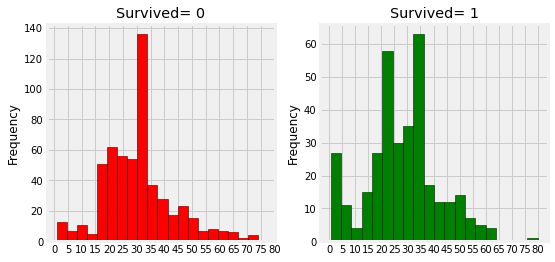

In [17]:
f, ax = make_figure(1,2)
# edgdcolor : bins 경계선
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor = 'black', color = 'red')
ax[0].set_title('Survived= 0')
ax[0].set_xticks(list(range(0,85,5)))
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
ax[1].set_xticks(list(range(0,85,5)))
plt.show()

- 관찰 결과

1) 유아(5세 미만)는 많이 생존했다.(여성과 아동 우선 정책).

2) 가장 오래된 승객은 생존했다.(80세)

3) 30-40세의 연령 그룹에서 가장 많은 사망자가 발생했다.

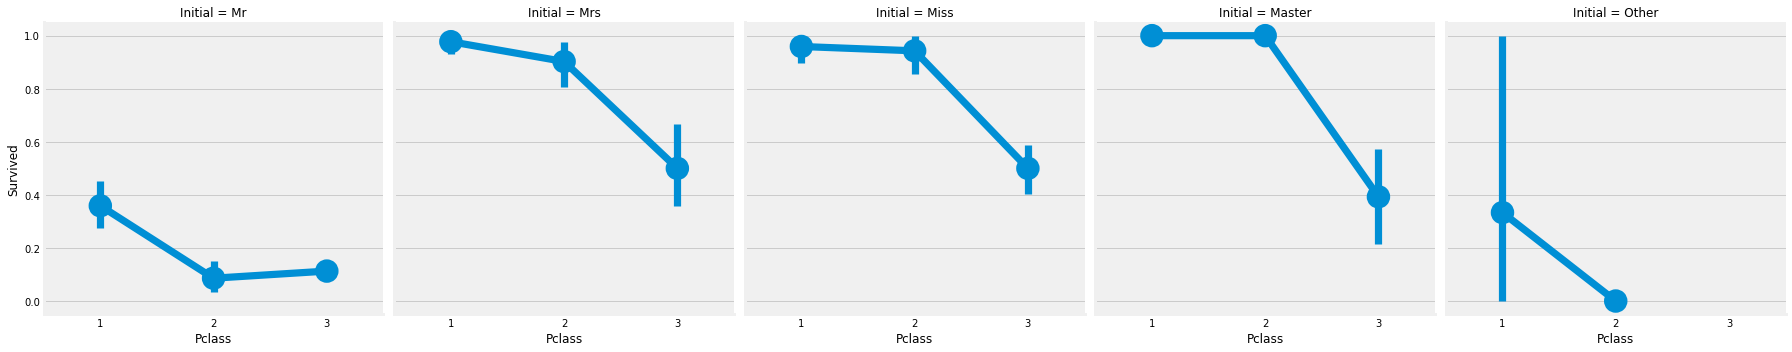

In [18]:
sns.factorplot(data= data, x= 'Pclass', y= 'Survived', col= 'Initial')

- 여성과 아이는 Pclass와 상관없이 우선 순위이다.

In [19]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived],margins = True).style.background_gradient(cmap = 'summer_r')

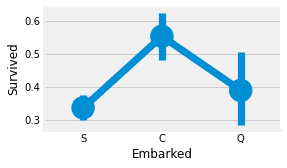

In [20]:
sns.factorplot(data= data, x = 'Embarked',y='Survived')
fig=plt.gcf()
fig.set_size_inches(4,2)
plt.show()

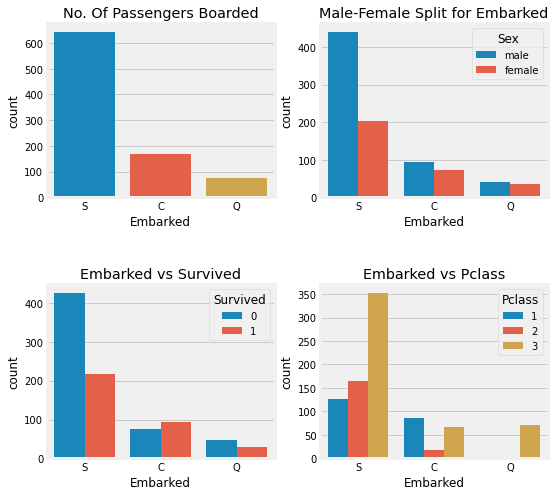

In [21]:
f, ax = make_figure(2,2)
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5) # 간격
plt.show()

- 관찰 결과

1) S에서 많은 승객이 탑승했고 대다수는 Pclass 3이다.

2) C의 승객들은 생존률이 높다.그 이유는 Pclass가 1인 사람이 많기 때문이다.

3) S는 부자들이 많이 탑승한 항구로 보인다. 하지만 여전히 생존율은 낮다. Pclass가 3인 승객들 중 **81%**가 생존하지 못했다.

4) Q 승객들은 95%가 Pclass가 3인 승객이다.

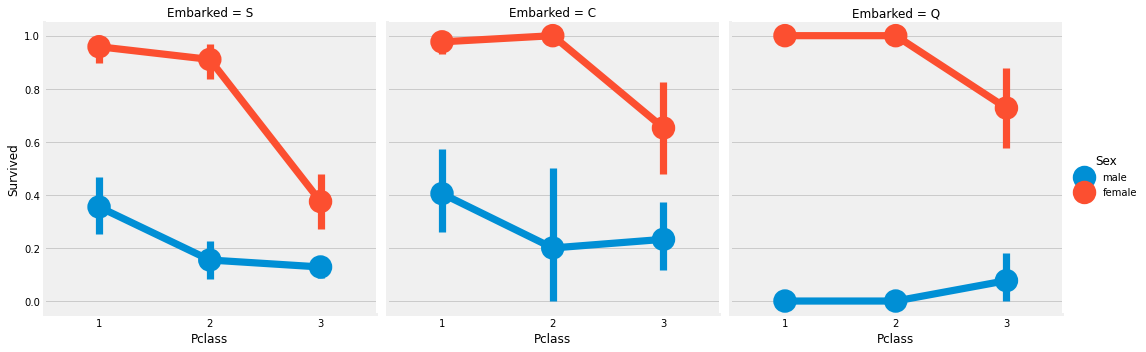

In [22]:
sns.factorplot(data=data,x = 'Pclass',y = 'Survived', col = 'Embarked', hue = 'Sex')

- 관찰 결과

1) Pclass와 상관없이 Pclass 1과 Pclass 2의 여성의 생존 확률은 거의 1이다.

2) S의 Pclass 3인 승객들의 남녀 생존율이 매우 낮다.

3) Q에서는 Pclass와 상관없이 남성의 생존율이 매우 낮다.

<br>

- `Embarked NaN 채우기`
    - S 항구에서 가장 많은 탑승객이 탔기 때문에 NaN 값을 S로 대체한다.

In [23]:
data['Embarked'].fillna('S',inplace = True)

data.Embarked.isnull().any()

False

#### `Sibsip`

- 이 feature는 혼자인지 또는 가족과 함께 있는지를 나타냅니다.

- Sibling : 형제, 자매 / Spouse : 배우자

In [24]:
pd.crosstab([data.SibSp], [data.Survived]).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


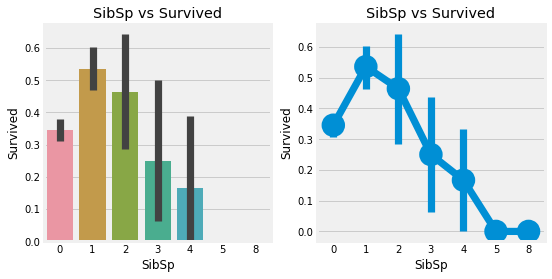

In [25]:
f, ax = make_figure(1,2)
sns.barplot('SibSp','Survived',data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)

In [26]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 관찰 결과

barplot과 factorplot은 승객이 형제 자매없이 혼자 탑승하는 경우 생존율이 34.5 %임을 나타낸다. 가족 수가 증가하면 그래프가 크게 줄어 듭니다.당연하다. 가족이 있으면 자신보다 가족을 생존시키려고 할 것이기 때문이다. 놀라운 사실은 가족 수가 5-8인 승객의 생존율은 **0%**입니다. Pclass 때문일까?

이유는 **Pclass**였다. crosstab을 보면 가족 수가 3이상인 승객은 모두 Pclass 3이다. 

In [27]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


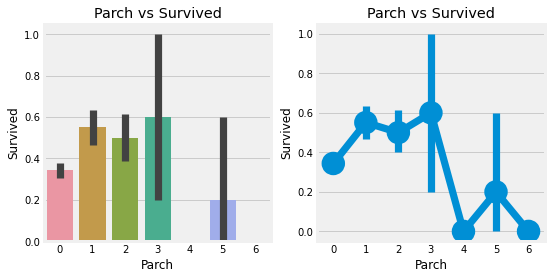

In [28]:
f, ax = make_figure(1,2)
sns.barplot(data=data, x='Parch',y='Survived',ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

- 관찰 결과

여기에서도 결과는 매우 비슷하다. 부모와 함께 탑승 한 승객은 생존 가능성이 더 높다. 그러나 숫자가 올라 갈수록 줄어 든다.

배에 1-3명의 가족이 있는 승객의 생존율이 높다. 혼자 탑승했을 때도 높게 나타난다.
4명 이상의 가족이 있을 경우 생존율이 감소한다.

In [29]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


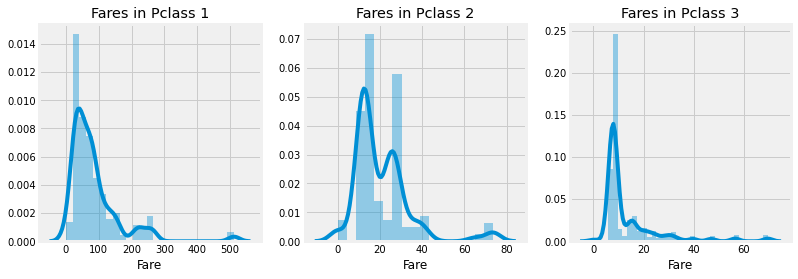

In [30]:
f, ax = make_figure(1,3)
sns.distplot(data[data['Pclass']==1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

- **`모든 feature의 특징`**
    - **Sex** : 남성보다 여성의 생존율이 높다.
    - **Pclass** : 1등석 승객일 경우 생존율이 높게 나타나며 Pclass 3일 때 매우 낮다. 여성의 경우 Pclass가 1일 때 생존율이 1에 가깝고, 2일 때 역시 생존율이 매우 높다.
    - **Age** : 5-10세 미만의 어린이는 생존 가능성이 높다. 15 ~ 35세 승객은 많이 사망했다.
    - **Embarked** : Pclass 1인 승객의 대부분이 S임에도 불구하고 C의 생존율이 더 높은 것을 알 수 있다. Q의 승객은 모두 Pclass 3이다.
    - **Parch + SibSp** : 1-2명의 형제들 또는 배우자와 함께 또는 1-3명의 가족들과 탑승했을 때 혼자 또는 여러명의 가족들과 함께 탑승했을 때보다 생존율이 높다.

<br>

- **Feature간의 상관계수**

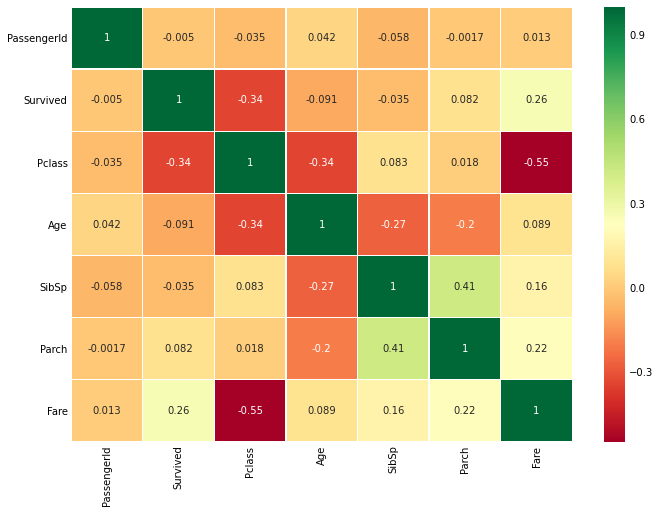

In [31]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.3) # annot = True : 값 표시 유무
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

- **Heatmap 해석**

각 feature별 상관도가 크지 않음을 알 수 있다. **SibSp, Parch**의 상관 계수 값이 0.41로 가장 높다. 이로써 모든 feature를 이용할 수 있다.

### Part2 : Feature Engineering and Data Cleaning

dataset의 feature들이 꼭 중요한 feature들은 아니다. 중복된 정보를 가진 feature은 제거해야 한다. 또한 feature의 정보에 대한 관찰과 추출을 통해 새로운 feature도 생성할 수 있다.

- **Age_band**

Age는 연속형 변수이므로 Binning 또는 정규화를 통해 범주형 변수로 변환시켜야 된다.
범위를 정해 각 범위 별 값을 할당할 것이다. 최고령자는 80이므로 0-80까지 5개의 범주로 나누고 각 범위별 16으로 나눠준다.

In [32]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [33]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


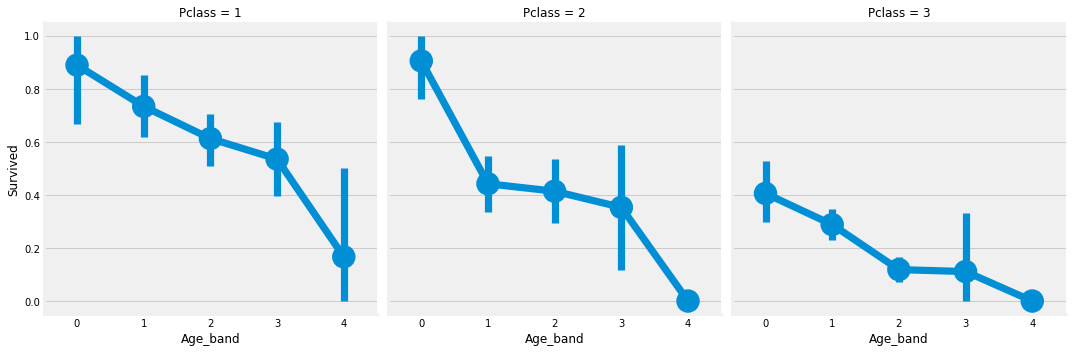

In [34]:
sns.factorplot(data=data, x = 'Age_band', y = 'Survived', col = 'Pclass')

Pclass와 상관없이 Age가 증가할수록 생존율이 감소한다.

- **Family_Size and Alone**

Parch, SibSp의 결합으로 가족 크기에 따른 생존율을 체크해본다. 'Family_size'는 형제 자매, 부부의 합으로 가족 수를 나타낸다. 'Alone'은 승객이 혼자인지 아닌지 나타낸다.

In [35]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp'] # Family size
data['Alone'] = 0
data.loc[data.Family_Size == 0,'Alone'] = 1 # Alone

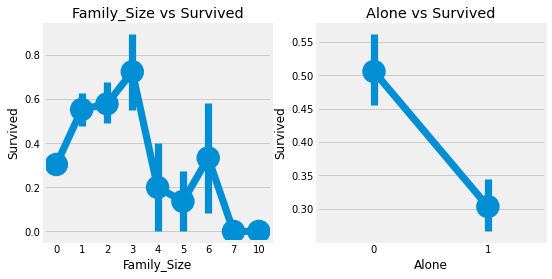

In [36]:
f, ax = make_figure(1,2)

sns.factorplot('Family_Size','Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)

- Alone = 1, Family_Size = 0 일때 생존의 기회가 낮아진다.
- Family_Size > 4일때도 역시 낮아진다.
- 이것은 중요한 feature로 볼 수있다.

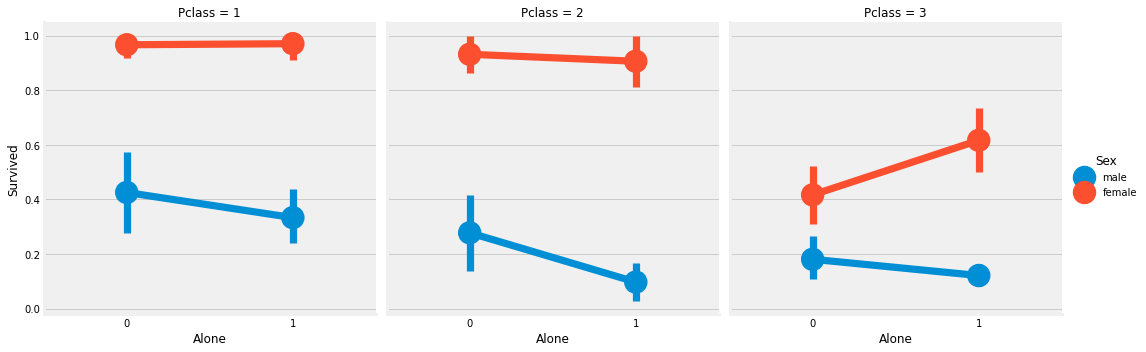

In [37]:
sns.factorplot(data=data, x = 'Alone', y = 'Survived', hue = 'Sex', col = 'Pclass')

Pclass 3의 여성을 제외하면 Alone일 때 생존율이 낮아진다.

- Fare_Range

Fare 값이 연속형 변수 이므로 이산형으로 바꿔야 한다. 그래서 pandas.qcut을 사용할 것이다. 균등한 간격으로 5개의 범주로 나누고 재배치할 것 이다.

In [38]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)

data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap = 'summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Fare_Range가 **증가함에 따라 생존 가능성이 증가**한다는 것을 분명히 알 수 있다.

Fare_Range의 값을 바로 이용할 수 없다. 하나의 값으로 정해주어야 한다.

In [39]:
data['Fare_cat'] = 0

data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

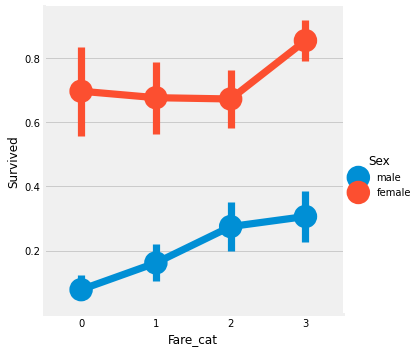

In [40]:
sns.factorplot(data=data, x='Fare_cat', y='Survived', hue = 'Sex')

Fare_cat이 증가함에 따라 생존 확률이 증가한다. 이 feature은 'Sex'와 함께 모델링하는 동안 중요한 feature가 될 수 있다.

- 문자열 값을 숫자로 변환

문자열 값은 모델에 입력할 수 없으므로 수치형으로 변경해줘야 한다.

In [41]:
data['Sex'].replace(['male', 'female'], [0,1], inplace = True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace = True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace = True)

- 불필요한 feature 삭제

In [42]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId']\
          ,axis=1,inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text major ticklabel objects>)

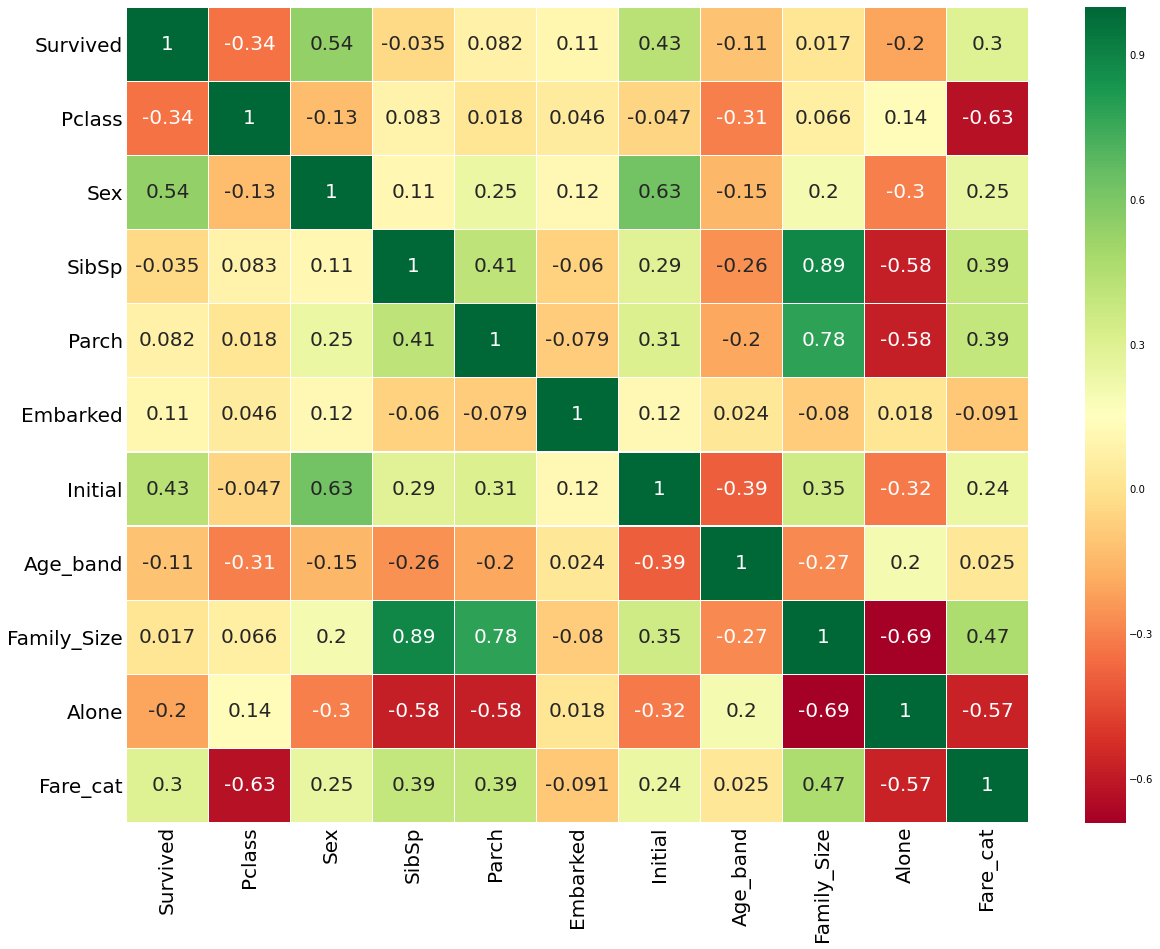

In [43]:
sns.heatmap(data.corr(), annot=True, cmap = 'RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

위의 상관도 표를 봤을 때, `Survived`와 **Pclass, Alone**은 **음의 상관관계**이고 **Sex, Initial, Fare_cat**과는 **양의 상관관계**임을 알 수 있다.

### Part3: Predictive Modeling

EDA part에서 몇 insights를 얻었다. 그러나 이를 통해 승객의 생존 여부를 정확하게 예측하거나 알 수 없다. 이제 분류 알고리즘을 이용해 승객의 생존 여부를 예측할 것이다. 다음은 모델은 만드는데 사용할 알고리즘이다.

- Logistic Regression
- Support Vector Machines(Linear and radial)
- Random Forest
- K-Nearest Neighbors
- Naive Bayes
- Decision Tree

In [44]:
# importing all the required ML package
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [49]:
train, test = train_test_split(data, 
                               test_size=0.3,
                               random_state=0, 
                               stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

#### [참고 링크](https://www.kaggle.com/ash316/eda-to-prediction-dietanic)